<b>Elbow Method, untuk menentukan jumlah kluster </b>

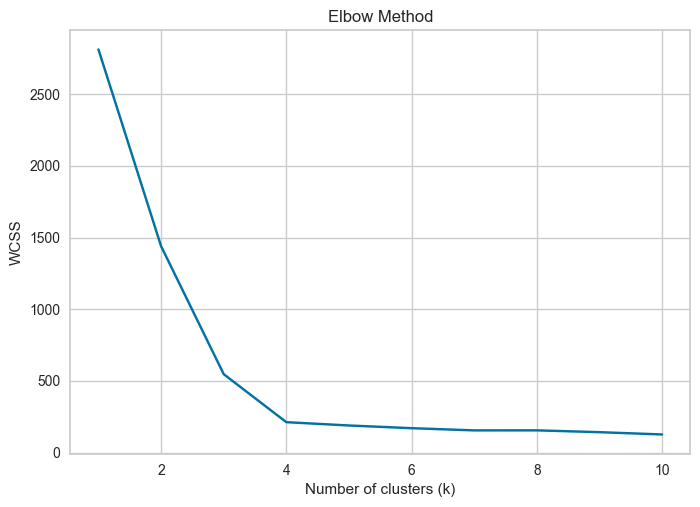

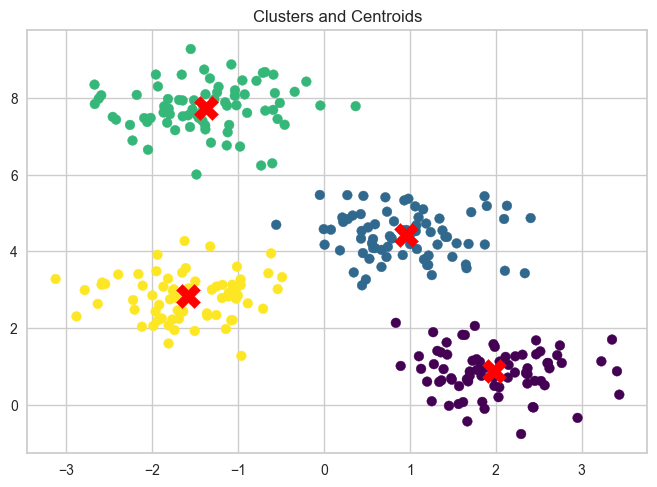

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data (contoh)
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Setelah memilih k optimal (misalnya, k=4 dari elbow plot)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

# Visualisasi hasil klaster
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Clusters and Centroids')
plt.show()


<b>Dimension Reduction Mengurangi Dimensi Fitur </b>

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Contoh data
X = np.random.rand(100, 10)  # Data dengan 100 sampel, 10 fitur

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduksi dimensi ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Dimensi asli: {X.shape}")
print(f"Dimensi setelah PCA: {X_pca.shape}")


Dimensi asli: (100, 10)
Dimensi setelah PCA: (100, 2)


Dimensional Reduction (Reduksi Dimensi) adalah teknik dalam data mining
dan machine learning yang digunakan untuk mengurangi jumlah variabel acak
di bawah pertimbangan, dengan cara memperoleh sekumpulan variabel
utama.

Mengurangi Komputasi, Mengatasi Curse of Dimensionality,Memperbaiki Visualisasi Data,Menghilangkan Noise,Mengatasi Overfitting

<b>Import yang diperlukan</b>

In [4]:
import pandas as pd  # Manipulasi data
import numpy as np  # Komputasi numerik dan array

from sklearn.preprocessing import StandardScaler  # Normalisasi data (mean=0, std=1)
from sklearn.decomposition import PCA  # Reduksi dimensi dengan PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  # Reduksi dimensi berbasis klasifikasi

from sklearn.model_selection import train_test_split  # Split data train-test
from sklearn.metrics import accuracy_score  # Evaluasi akurasi model

from mlxtend.feature_selection import SequentialFeatureSelector  # Seleksi fitur otomatis
from sklearn.preprocessing import OneHotEncoder  # Encoding data kategorikal

import matplotlib.pyplot as plt  # Visualisasi data


<b>Memuat Dataset</b>

In [5]:
# Memuat dataset
df = pd.read_csv('HousePriceTrain.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<b>Membersihkan Data</b>

In [6]:
vdf = df.drop('Id', axis=1)  # Hapus kolom 'Id' dari DataFrame
print(df.shape)  # Cetak dimensi DataFrame setelah penghapusan

(1460, 81)


In [7]:
df.loc[:, df.isna().any()]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [8]:
new_df = df.dropna(axis=1) # hapus fitur dengan data kosong
print(new_df.shape)

(1460, 62)


<b>Identifikasi dan Transformasi Kolom Kategorikal</b>

In [12]:
s = (new_df.dtypes == 'object')  # Cari kolom bertipe 'object'
object_cols = list(s[s].index)  # Daftar kolom categorical
print("Variabel/fitur bertipe Categorical:")  # Tampilkan nama kolom
print(object_cols)  
print('\nJumlah fitur Categorical:', len(object_cols))  # Tampilkan jumlahnya


Variabel/fitur bertipe Categorical:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Jumlah fitur Categorical: 27


<b>Gabungkan Data Numerik dan Hasil Encoding</b>

In [13]:
OH_encoder = OneHotEncoder(sparse_output=False)  # Inisialisasi OneHotEncoder
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))  # Transform fitur categorical ke OneHot
OH_cols.index = new_df.index  # Set indeks agar sama dengan DataFrame asli
OH_cols.columns = OH_encoder.get_feature_names_out()  # Set nama kolom hasil encoding

df_final = new_df.drop(object_cols, axis=1)  # Hapus kolom categorical dari DataFrame asli
df_final = pd.concat([df_final, OH_cols], axis=1)  # Gabungkan data asli dengan hasil encoding

<b> Pisahkan Fitur (X) dan Target (y) </b>

In [14]:
X = df_final.drop('SalePrice', axis=1) #data fitur
y = df_final['SalePrice'] #data target

In [15]:
print (X)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0             2003         706           0        150  ..

<b>Standarisasi Fitur </b>

In [16]:
# Standarisasi fitur [lihat materi minggu ke-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
print(X_scaled)

[[-1.73086488  0.07337496 -0.20714171 ... -0.11785113  0.4676514
  -0.30599503]
 [-1.7284922  -0.87256276 -0.09188637 ... -0.11785113  0.4676514
  -0.30599503]
 [-1.72611953  0.07337496  0.07347998 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [ 1.72611953  0.30985939 -0.14781027 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.7284922  -0.87256276 -0.08016039 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.73086488 -0.87256276 -0.05811155 ... -0.11785113  0.4676514
  -0.30599503]]


In [18]:
pip install yellowbrick;


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<b> Import Library </b>

In [19]:
from sklearn.cluster import KMeans # Import KMeans untuk algoritma clustering
from yellowbrick.cluster import KElbowVisualizer # Import visualisasi elbow untuk menentukan jumlah cluster optimal

#KElbowVisualizer digunakan untuk menemukan jumlah kluster optimal dengan melihat "elbow point" dari metrik tertentu.

<b> Inisiasi Model KMeans </b>

In [33]:
model = KMeans()  # Membuat model KMeans tanpa menentukan jumlah kluster (n_clusters)


<b>Visualisasi Elbow </b>

In [34]:
# Visualisasi Elbow menggunakan metrik Calinski-Harabasz untuk memilih jumlah cluster optimal
visualizer = KElbowVisualizer(model, k=(4,12),metric='calinski_harabasz', timings=False)

<b>Reduksi Dimensi dengan PCA</b>

In [35]:
# Menerapkan PCA dengan 4 komponen
pca = PCA(n_components=4) 
X_pca = pca.fit_transform(X_scaled) # Transformasi data yang telah distandarisasi


<b> Fit Data dan Visualisasi Elbow </b>

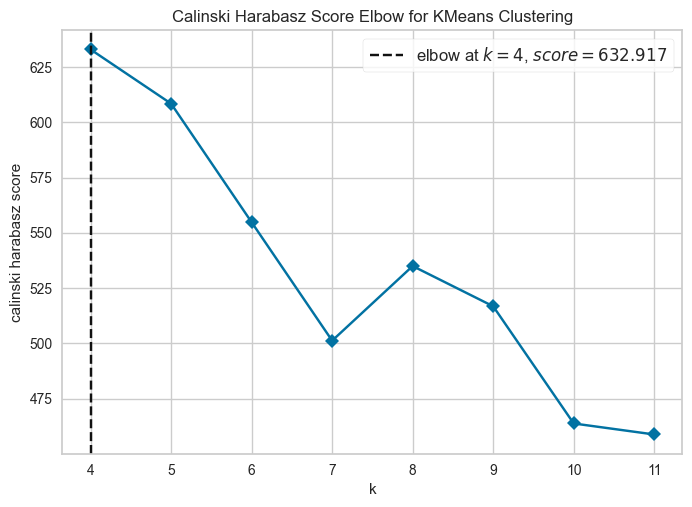

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [36]:
visualizer.fit(X_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

<b> Membuat DataFrame untuk Komponen Utama </b>

In [30]:
# Menampilkan komponen utama
components = pca.components_
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.sum(explained_variance)
print('\nVariansi yang Dijelaskan oleh Setiap Komponen Utama:')
print(explained_variance)
print('\nKumulatif Variansi yang Dijelaskan oleh Setiap Komponen Utama:')
print(cumulative_explained_variance)


Variansi yang Dijelaskan oleh Setiap Komponen Utama:
[0.06163286 0.03091745 0.02708598 0.02210719]

Kumulatif Variansi yang Dijelaskan oleh Setiap Komponen Utama:
0.14174348056865976


Evaluasi Model

In [21]:
components_df = pd.DataFrame(components, columns=X.columns,
index=[f'PC{i+1}' for i in range(4)])
explained_variance_df = pd.DataFrame(explained_variance, index=[f'PC{i+1}'
for i in range(4)], columns=['Explained Variance'])
print('\nKomponen Utama dalam DataFrame:')
print(components_df)


Komponen Utama dalam DataFrame:
     MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
PC1   -0.012161  0.034845     0.220096    -0.063255   0.224988      0.195788   
PC2   -0.158128  0.143917    -0.021395     0.027155   0.039103     -0.050639   
PC3   -0.018274  0.172248     0.080431     0.021630  -0.142569     -0.041938   
PC4   -0.108409  0.023721    -0.009061    -0.095621  -0.007618     -0.012401   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLw  \
PC1    0.075709   -0.020029   0.086524     0.158493  ...       -0.009328   
PC2    0.173523    0.106870  -0.087476     0.131593  ...       -0.029631   
PC3    0.025649    0.014882   0.049520     0.082015  ...        0.011820   
PC4    0.064824    0.002136   0.086820     0.155626  ...        0.026746   

     SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
PC1      0.131522     -0.009141    -0.090376              -0.031326   
PC2     -0.068666      0.004288     0.05203

Menampilkan nilai kontribusi dari PC1 hingga PC4

In [23]:
for i in range(4):
    print(f'\nFitur dan Nilai yang paling berkontribusi pada PC{i+1}:')
    print(components_df.iloc[i].sort_values(ascending=False))


Fitur dan Nilai yang paling berkontribusi pada PC1:
YearBuilt            0.224988
OverallQual          0.220096
Foundation_PConc     0.205327
YearRemodAdd         0.195788
GarageCars           0.192168
                       ...   
CentralAir_N        -0.109302
HeatingQC_TA        -0.122672
Foundation_CBlock   -0.132970
KitchenQual_TA      -0.182024
ExterQual_TA        -0.208705
Name: PC1, Length: 215, dtype: float64

Fitur dan Nilai yang paling berkontribusi pada PC2:
MSZoning_RL            0.225854
Foundation_CBlock      0.201302
BsmtFinSF1             0.173523
1stFlrSF               0.159072
Exterior2nd_Plywood    0.157206
                         ...   
Foundation_BrkTil     -0.131508
HouseStyle_2Story     -0.138914
2ndFlrSF              -0.152444
MSSubClass            -0.158128
MSZoning_RM           -0.170674
Name: PC2, Length: 215, dtype: float64

Fitur dan Nilai yang paling berkontribusi pada PC3:
GrLivArea            0.277670
TotRmsAbvGrd         0.255239
2ndFlrSF             

menemukan dan menentukan jumlah fitur yang optimal

In [24]:
print('\nFitur yang paling berkontribusi pada PC1:')
pc1_loadings = components_df.iloc[1].sort_values(ascending=False)
print("Loadings untuk PC1:")
print(pc1_loadings)


Fitur yang paling berkontribusi pada PC1:
Loadings untuk PC1:
MSZoning_RL            0.225854
Foundation_CBlock      0.201302
BsmtFinSF1             0.173523
1stFlrSF               0.159072
Exterior2nd_Plywood    0.157206
                         ...   
Foundation_BrkTil     -0.131508
HouseStyle_2Story     -0.138914
2ndFlrSF              -0.152444
MSSubClass            -0.158128
MSZoning_RM           -0.170674
Name: PC2, Length: 215, dtype: float64


Visualisasi nilai loadings untuk PC1

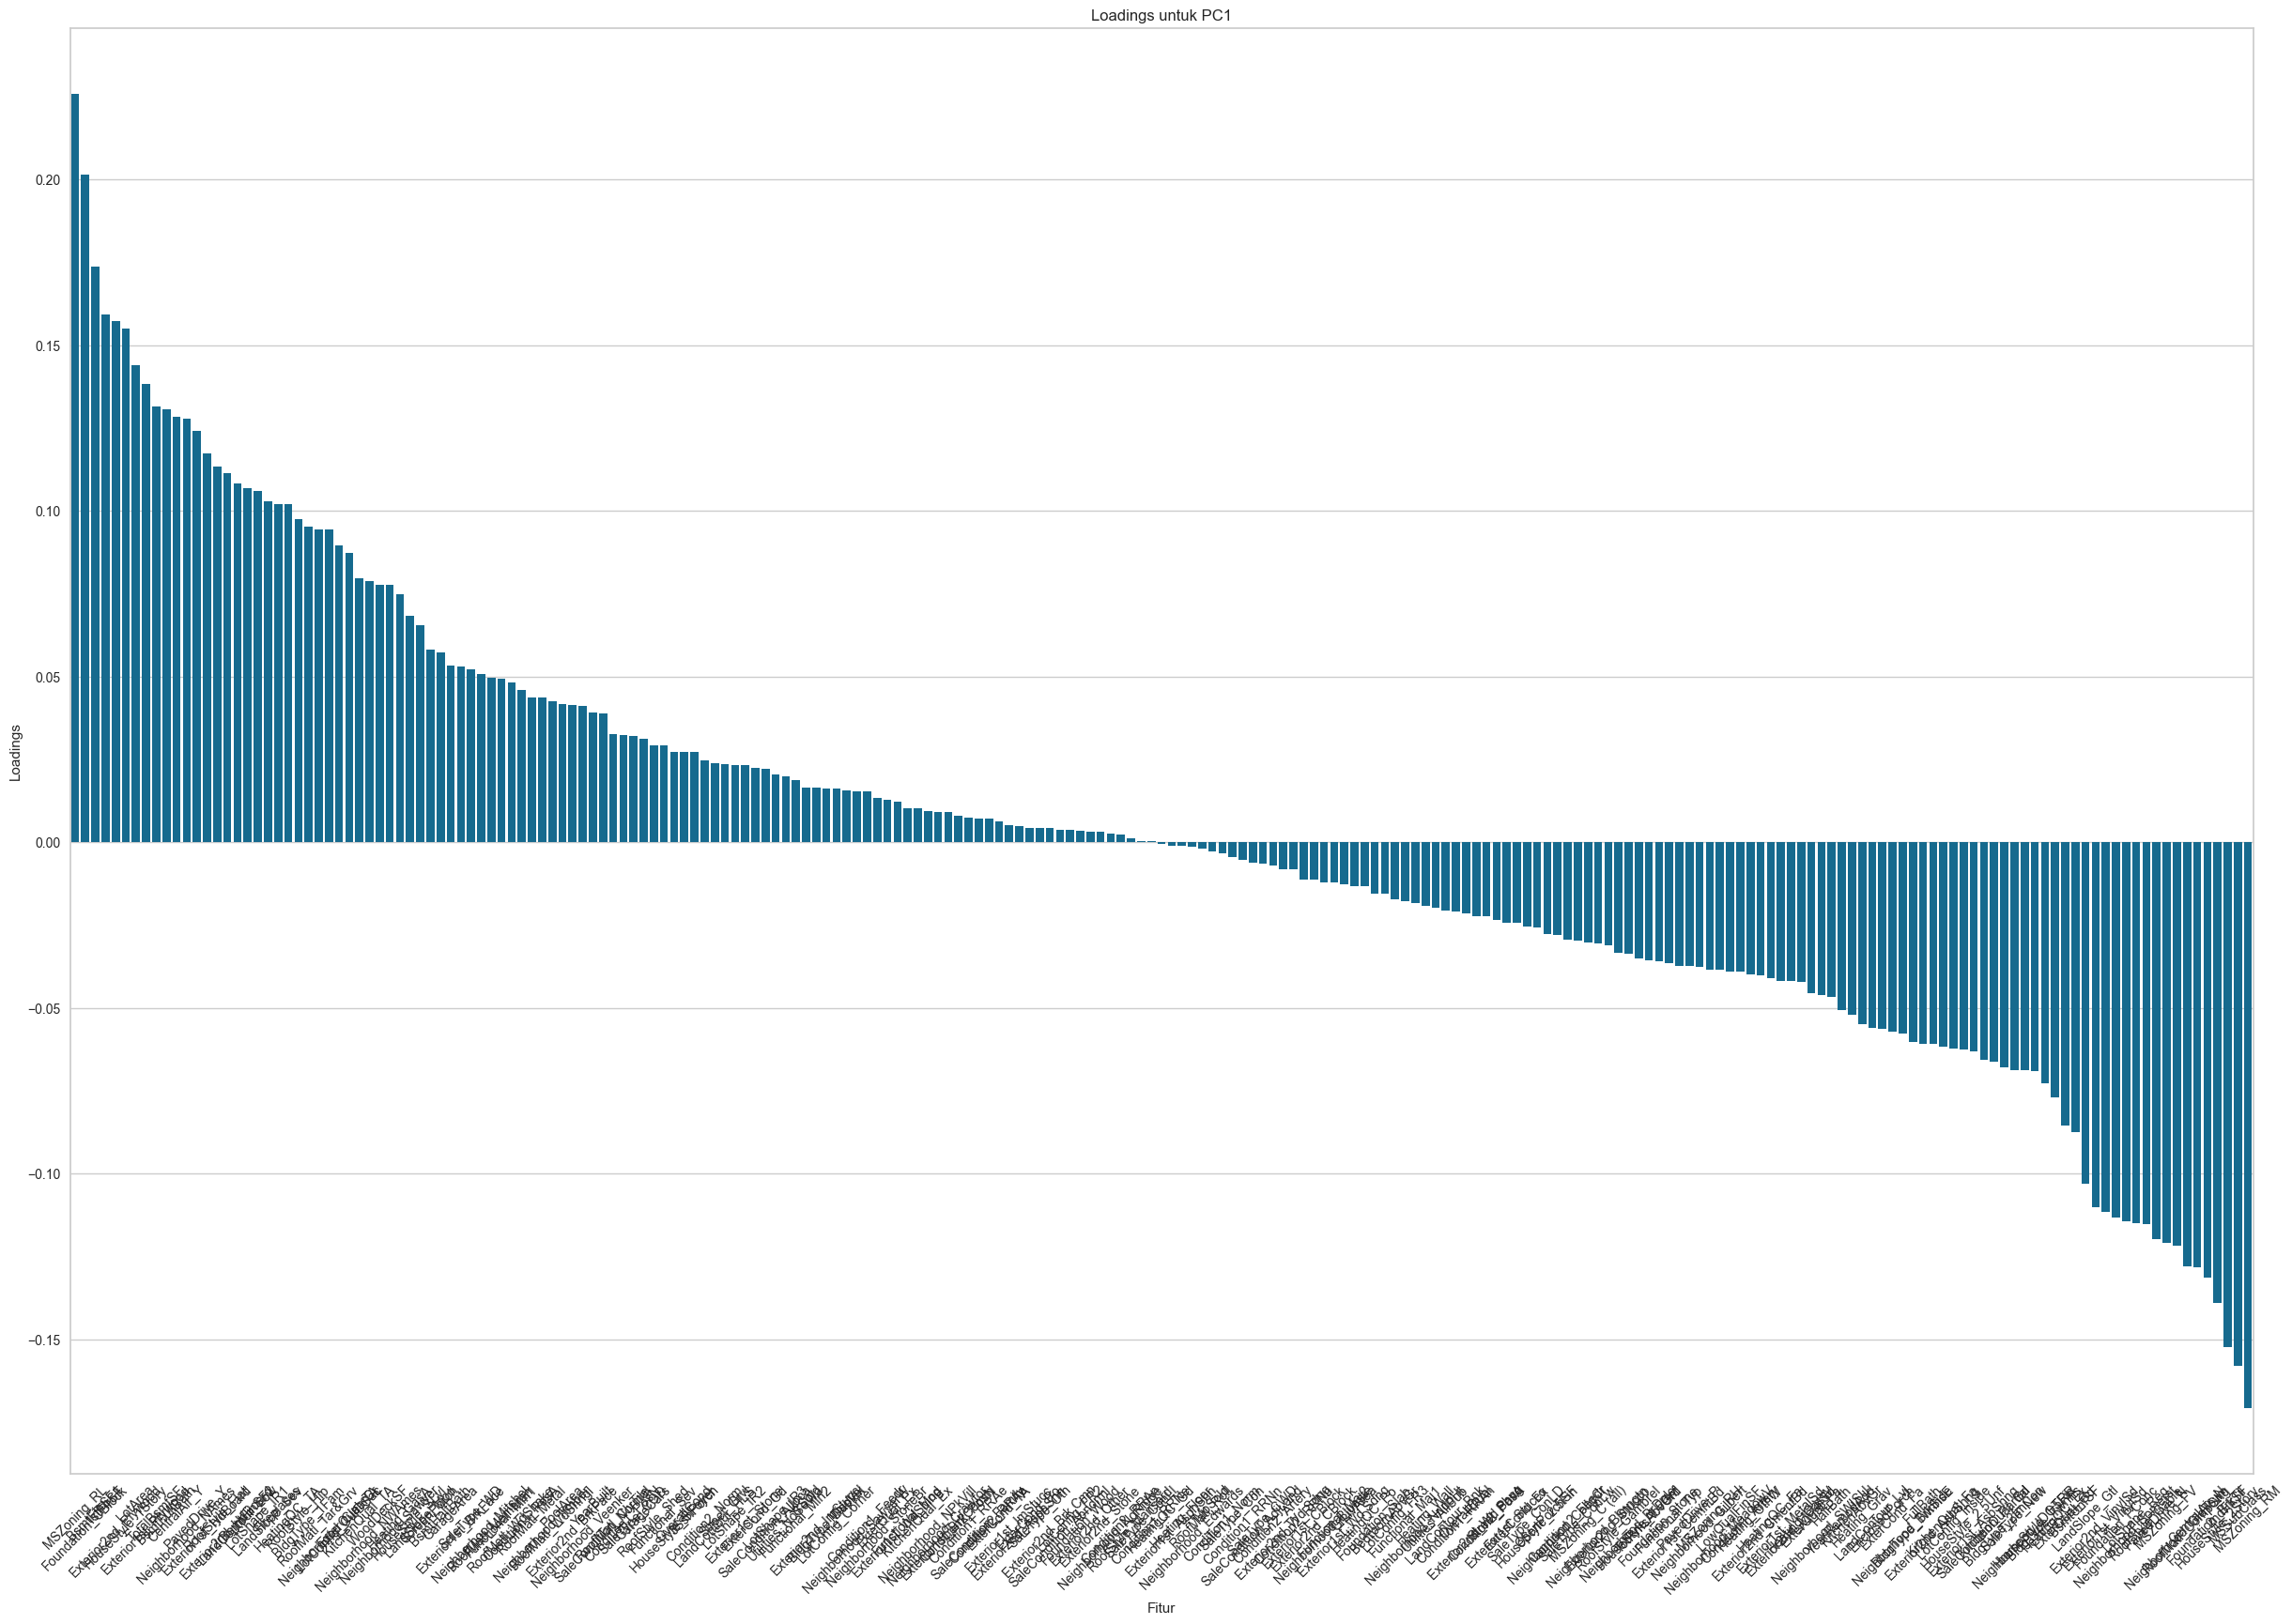

In [25]:
import seaborn as sns
plt.figure(figsize=(30, 20))
sns.barplot(x=pc1_loadings.index, y=pc1_loadings.values)
plt.xlabel('Fitur')
plt.ylabel('Loadings')
plt.title('Loadings untuk PC1')
plt.xticks(rotation=45)
plt.show()

Menetapkan threshold untuk loadings

In [56]:
# Menetapkan threshold untuk loadings
# Threshold ini menjadi batas pemilihan fitur dengan kontribusi tertinggi.
# Fitur yang memiliki nilai loadings di atas atau di bawah threshold tertentu dapat dianggap penting.
threshold = 0.1 
# # Misalnya, threshold ini bisa disesuaikan
# Memilih fitur yang kontribusinya lebih besar dari threshold 
important_features_pc1 = pc1_loadings[pc1_loadings.abs() > threshold].index.tolist()
important_features_pc1_count = len(important_features_pc1)
print("Fitur penting untuk berdasarkan threshold:")
print(important_features_pc1)
print("\nJumlah Fitur penting untuk berdasarkan threshold:")
print(important_features_pc1_count)

Fitur penting untuk berdasarkan threshold:
['MSZoning_RL', 'Foundation_CBlock', 'BsmtFinSF1', '1stFlrSF', 'Exterior2nd_Plywood', 'HouseStyle_1Story', 'LotArea', 'Exterior1st_Plywood', 'TotalBsmtSF', 'BsmtFullBath', 'CentralAir_Y', 'Neighborhood_NAmes', 'PavedDrive_Y', 'Exterior1st_HdBoard', 'RoofStyle_Flat', 'Exterior2nd_HdBoard', 'LandContour_Low', 'BsmtFinSF2', 'LotShape_IR1', 'LandSlope_Sev', 'Fireplaces', 'HeatingQC_TA', 'LandSlope_Gtl', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'Foundation_PConc', 'Neighborhood_Somerst', 'LotShape_Reg', 'RoofStyle_Gable', 'PavedDrive_N', 'MSZoning_FV', 'Neighborhood_OldTown', 'RoofMatl_CompShg', 'CentralAir_N', 'Foundation_BrkTil', 'HouseStyle_2Story', '2ndFlrSF', 'MSSubClass', 'MSZoning_RM']

Jumlah Fitur penting untuk berdasarkan threshold:
39


In [57]:
new_X = X[['YearBuilt', 'OverallQual', 'Foundation_PConc', 'YearRemodAdd','GarageCars', 'ExterQual_Gd', 'GarageArea', 'FullBath', 'HeatingQC_Ex','Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'TotalBsmtSF','KitchenQual_Gd', 'GrLivArea', '1stFlrSF', 'SaleType_New','SaleCondition_Partial', 'CentralAir_Y', 'TotRmsAbvGrd', 'PavedDrive_Y','KitchenQual_Ex', 'Neighborhood_NridgHt', 'MSZoning_RM', 'CentralAir_N','HeatingQC_TA', 'Foundation_CBlock', 'KitchenQual_TA', 'ExterQual_TA']]
print(new_X.shape)
new_X.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices